In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:

df = pd.read_csv('/kaggle/input/food-delivery-orders/dataset_18_Food Delivery Orders.csv')

output = [] 
output.append("Exploratory Data Analysis of Home Cleaning Services\n")
output.append("====================================\n")
print(df.head())

         Date  Product Region Customer_Type  Quantity  Price  Discount  \
0  2024-12-01    Pizza  South           New        20  41.27      0.08   
1  2024-03-05    Sushi  North           New        27   9.38      0.09   
2  2024-01-23    Sushi  South           New        29   6.52      0.10   
3  2024-12-14  Burgers   West           New        24  61.31      0.23   
4  2024-08-09    Pizza  South       Regular        16  67.51      0.15   

   Revenue  
0   759.37  
1   230.47  
2   170.17  
3  1133.01  
4   918.14  


In [3]:
print(df.head())
output.append(f"First few rows:\n{df.head()}\n")

         Date  Product Region Customer_Type  Quantity  Price  Discount  \
0  2024-12-01    Pizza  South           New        20  41.27      0.08   
1  2024-03-05    Sushi  North           New        27   9.38      0.09   
2  2024-01-23    Sushi  South           New        29   6.52      0.10   
3  2024-12-14  Burgers   West           New        24  61.31      0.23   
4  2024-08-09    Pizza  South       Regular        16  67.51      0.15   

   Revenue  
0   759.37  
1   230.47  
2   170.17  
3  1133.01  
4   918.14  


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           1000 non-null   object 
 1   Product        1000 non-null   object 
 2   Region         1000 non-null   object 
 3   Customer_Type  1000 non-null   object 
 4   Quantity       1000 non-null   int64  
 5   Price          1000 non-null   float64
 6   Discount       1000 non-null   float64
 7   Revenue        1000 non-null   float64
dtypes: float64(3), int64(1), object(4)
memory usage: 62.6+ KB


In [5]:
print(df.describe())
output.append(f"Summary Statistics:\n{df.describe()}\n")

          Quantity        Price    Discount      Revenue
count  1000.000000  1000.000000  1000.00000  1000.000000
mean     15.314000    51.312980     0.14844   679.369510
std       8.508572    27.486733     0.08582   570.614398
min       1.000000     5.020000     0.00000     7.080000
25%       8.000000    28.100000     0.08000   210.852500
50%      15.000000    51.415000     0.15000   506.205000
75%      23.000000    75.060000     0.22000  1009.185000
max      30.000000    99.870000     0.30000  2677.750000


In [6]:
output.append("Data Cleaning Results:\n")
missing_values = df.isnull().sum()
print(missing_values)
output.append(f"Missing Values:\n{missing_values}\n")
df.dropna(inplace=True)
df['Date'] = pd.to_datetime(df['Date'])

Date             0
Product          0
Region           0
Customer_Type    0
Quantity         0
Price            0
Discount         0
Revenue          0
dtype: int64


In [9]:
duplicates = df.duplicated().sum()
output.append(f"Number of Duplicates Dropped: {duplicates}\n")
df.drop_duplicates(inplace=True)

In [10]:
total_revenue = df['Price'].sum()
output.append(f'Total Revenue: TK{total_revenue}\n')
print(f'Total Revenue: TK{total_revenue}')

Total Revenue: TK51312.98


In [11]:
average_price_per_service = df.groupby('Customer_Type')['Price'].mean()
output.append("Average Price per Customer Type:\n")
output.append(f"{average_price_per_service}\n")
print(average_price_per_service)

Customer_Type
New        51.088791
Regular    51.549138
Name: Price, dtype: float64


In [12]:
total_services_by_region = df['Region'].value_counts()
output.append("Total Services Provided by Region:\n")
output.append(f"{total_services_by_region}\n")
print(total_services_by_region)

Region
East     258
West     255
South    245
North    242
Name: count, dtype: int64


In [13]:
revenue_by_region = df.groupby('Region')['Price'].sum()
output.append("Total Revenue by Region:\n")
output.append(f"{revenue_by_region}\n")
print(revenue_by_region)

Region
East     13345.34
North    12144.78
South    12115.03
West     13707.83
Name: Price, dtype: float64


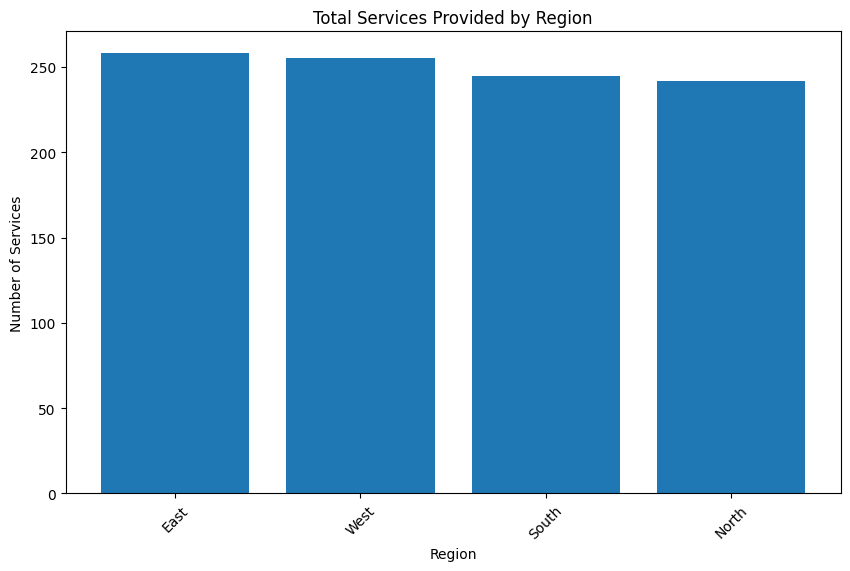

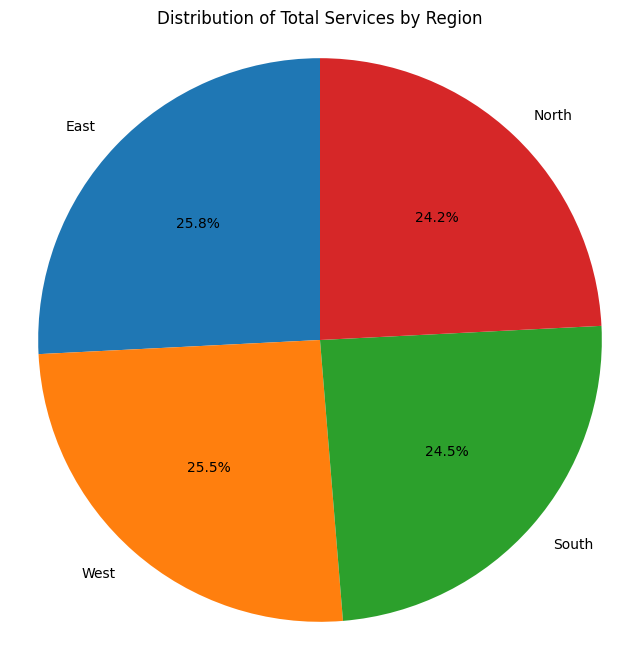

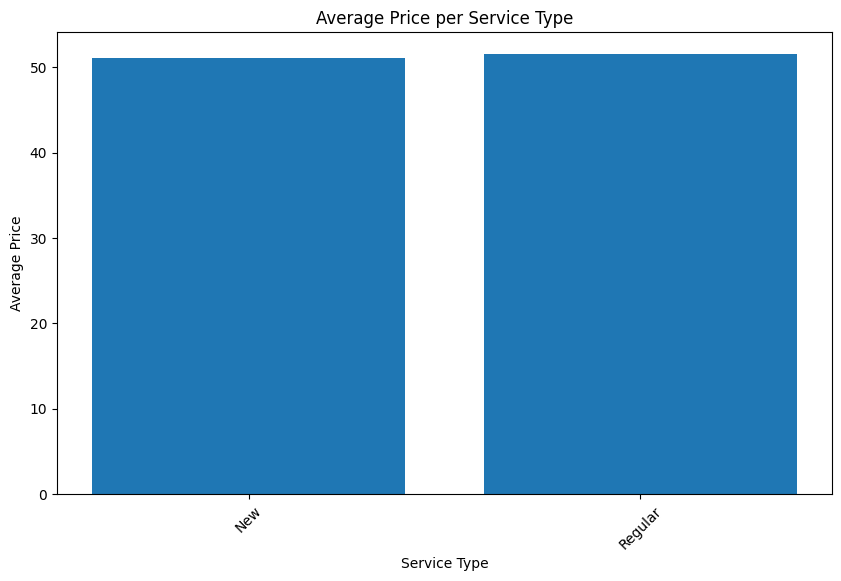

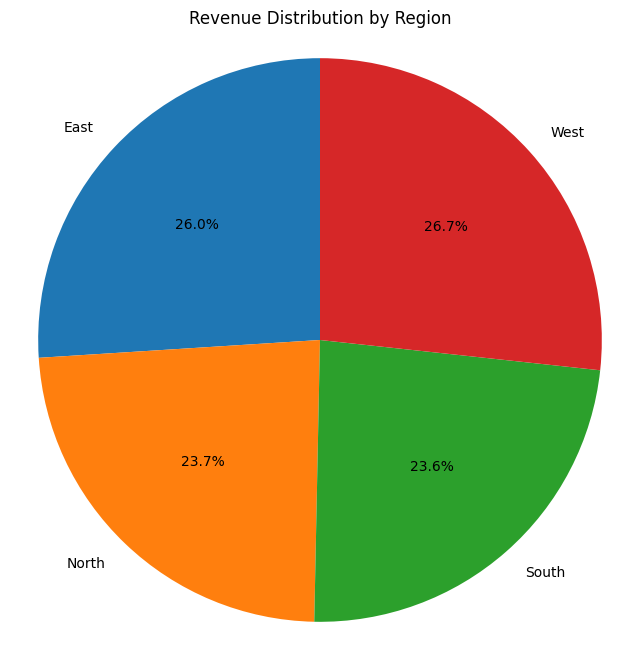

In [16]:
plt.figure(figsize=(10, 6))
plt.bar(total_services_by_region.index, total_services_by_region.values)
plt.title('Total Services Provided by Region')
plt.xlabel('Region')
plt.ylabel('Number of Services')
plt.xticks(rotation=45)
plt.savefig('total_services_by_region.png')  # Save the figure
plt.show()


plt.figure(figsize=(8, 8))
plt.pie(total_services_by_region, labels=total_services_by_region.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Total Services by Region')
plt.axis('equal')
plt.savefig('services_distribution_by_region.png')
plt.show()


plt.figure(figsize=(10, 6))
plt.bar(average_price_per_service.index, average_price_per_service.values)
plt.title('Average Price per Service Type')
plt.xlabel('Service Type')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.savefig('average_price_per_service.png')  # Save the figure
plt.show()



plt.figure(figsize=(8, 8))
plt.pie(revenue_by_region, labels=revenue_by_region.index, autopct='%1.1f%%', startangle=90)
plt.title('Revenue Distribution by Region')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular
plt.savefig('revenue_distribution_by_region.png')  # Save the figure
plt.show()



In [19]:
with open('analysis_output.txt', 'w') as f:
    f.writelines(output)